In [26]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt


# Change the default colormap of matplotlib
# plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.cmap'] = 'gray'

In [27]:
# Set the correct path 
image_path = "/home/bat/bat/programs/code/projects/energy-meter-ocr/proj/meter1.jpg"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use thresholding to binarize the image
_, binary_image = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)

## Dilation 

Dilating the image to enhance the energy meter reading text.

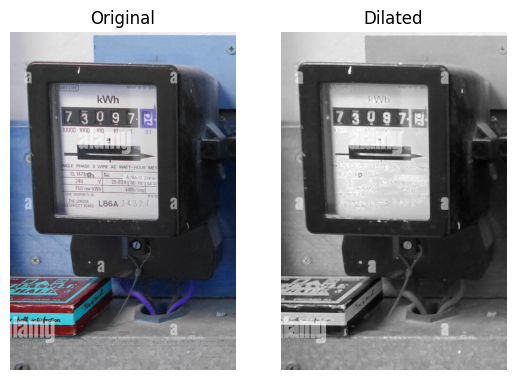

In [28]:
# Define the kernel (structuring element)
kernel = np.ones((3, 3), np.uint8)  # You can adjust the size of the kernel

# Perform dilation
dilated_result = cv2.dilate(gray, kernel, iterations=1)

# Display the original and dilated images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(dilated_result, cmap='gray'), plt.title('Dilated'), plt.axis('off')
plt.show()


## Binary Mask

Preparing a mask from the dilated image, which I am using at the end.

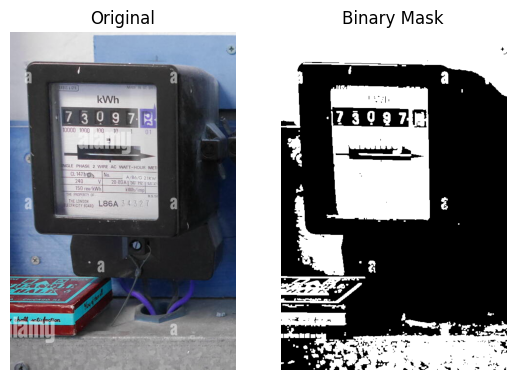

In [29]:
# Threshold the image to create a binary mask of the black region
_, binary_mask = cv2.threshold(dilated_result, 150, 255, cv2.THRESH_BINARY)


# Display the original and dilated images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(binary_mask, cmap='gray'), plt.title('Binary Mask'), plt.axis('off')
plt.show()

## Counters

Extract the largest contour (hopefully it will be the energy meter box)

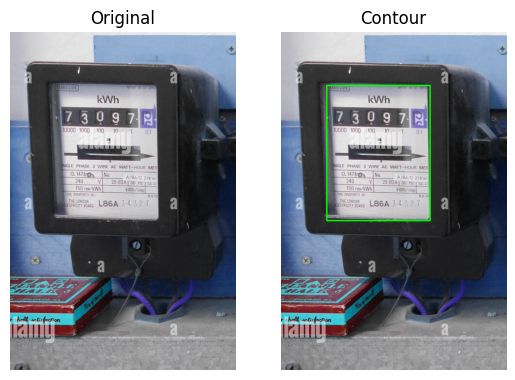

In [30]:
# Find contours
contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

'''  
# Draw contours on the original image
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
'''

# Assuming the largest contour corresponds to the black rectangular box
largest_contour = max(contours, key=cv2.contourArea)
max_contour_image = np.copy(image)

''' 
# Draw the largest contour on the original image
max_contour_image = np.copy(image)
cv2.drawContours(max_contour_image, largest_contour, -1, (0, 255, 0), 5)
'''

# Draw a rectangle that bounds the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)
cv2.rectangle(max_contour_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


# Display the original and dilated images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(max_contour_image, cmap='gray'), plt.title('Contour'), plt.axis('off')
plt.show()

## Crop

Cropping the important part of the image.

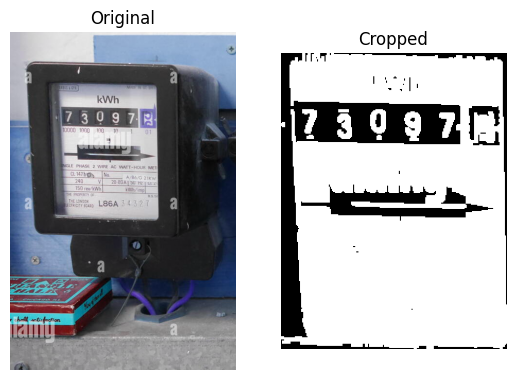

In [31]:
# Crop the region within the rectangle
cropped_region = binary_mask[y:y + h, x:x + w]

# Display the original and dilated images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(cropped_region, cmap='gray'), plt.title('Cropped'), plt.axis('off')
plt.show()


## Erosion

Eroding the image with a 2*2 mask.

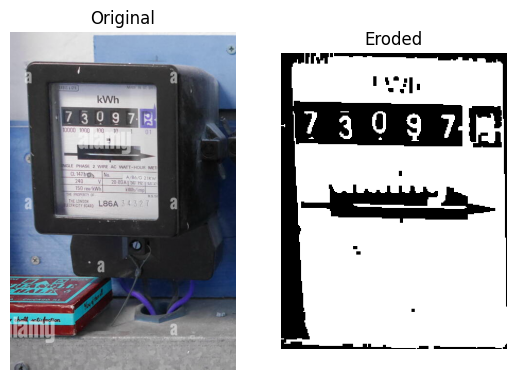

In [32]:
# Define the kernel (structuring element)
kernel = np.ones((2, 2), np.uint8)  

# Perform erosion
erosion_result = cv2.erode(cropped_region, kernel, iterations=2)

# Display the original and dilated images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(122), plt.imshow(erosion_result, cmap='gray'), plt.title('Eroded'), plt.axis('off')
plt.show()

# Visual Representation of entire process

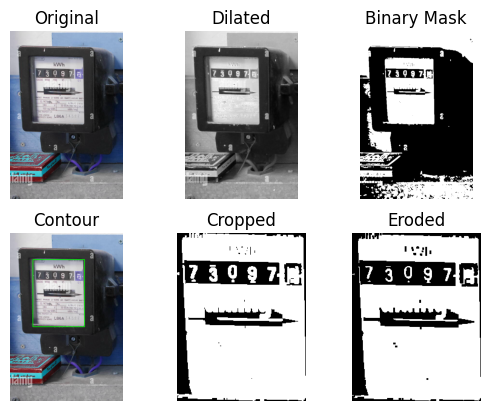

In [33]:
# Display the original and dilated images
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(232), plt.imshow(dilated_result, cmap='gray'), plt.title('Dilated'), plt.axis('off')
plt.subplot(233), plt.imshow(binary_mask, cmap='gray'), plt.title('Binary Mask'), plt.axis('off')
plt.subplot(234), plt.imshow(max_contour_image, cmap='gray'), plt.title('Contour'), plt.axis('off')
plt.subplot(235), plt.imshow(cropped_region, cmap='gray'), plt.title('Cropped'), plt.axis('off')
plt.subplot(236), plt.imshow(erosion_result, cmap='gray'), plt.title('Eroded'), plt.axis('off')
plt.show()